In [148]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as Color
%matplotlib inline
from astropy.utils.data import download_file
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture
import pandas as pd
import atpy
import aplpy
import montage_wrapper
from math import log10
from reproject import reproject_exact
from reproject import reproject_interp
from astropy.wcs import WCS

In [149]:
letter="a"
#i = 10
#band=1
arrmgePic = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_file = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_data = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image2 = [1, 2, 3, 4]#, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
testarray = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
short_array = [1, 2, 3, 4, 5]
image_file1 = [1, 2, 3, 4, 5]
image_data1 = [1, 2, 3, 4, 5]
testarray1 = [1, 2, 3, 4, 5]
testarray2 = [1, 2, 3, 4]
image_file2 = [1, 2, 3, 4]
image_data2 = [1, 2, 3, 4]
newtestarray2MASS = [1, 2, 3]
newtestarraySDSS = [1, 2, 3, 4, 5]
newtestarrayWISE = [1, 2, 3, 4]
Length_Range_WISE = [1 ,2, 3, 4]
Length_Range_SDSS = [1, 2, 3, 4, 5]
Length_Range_2MASS = [1, 2, 3]
parsing_headerWISE = [1, 2, 3, 4]
hduinfoWISE = [1, 2, 3, 4]
wcsWISE1 = [1, 2, 3, 4]
hdudataWISE = [1, 2, 3, 4]
parsing_headerSDSS = [1, 2, 3, 4, 5]
hduinfoSDSS = [1, 2, 3, 4, 5]
wcsSDSS1 = [1, 2, 3, 4, 5]
hdudataSDSS = [1, 2, 3, 4, 5]

In [150]:
for i in range(10, 11): #arrmgPic:
    for bands in flat_image2:
        image_file2[bands-1] = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/wise-%i%c-%i.fits' % (i, letter, bands)
        hdu_list2 = fits.open(image_file2[bands-1])
        image_data2[bands-1] = fits.getdata(image_file2[bands-1])
        testarray2[bands-1]=image_file2[bands-1]
        newtestarrayWISE[bands-1] = image_data2[bands-1]
        #newtestarrayWISE[bands-1] = image_file2[bands-1]
        Length_Range_WISE[bands-1]=len(newtestarrayWISE[bands-1])
        #print(len(newtestarrayWISE[bands-1]) )
        #print(newtestarrayWISE[bands-1])
        
         
        parsing_headerWISE[bands-1] = get_pkg_data_filename(image_file2[bands-1])
        hduinfoWISE[bands-1] = fits.open(parsing_headerWISE[bands-1])[0]
        wcsWISE1[bands-1] = WCS(hduinfoWISE[bands-1].header)
        hdudataWISE[bands-1] = hduinfoWISE[bands-1].data
        
        
    #print(image_data2[0])
    print(wcsWISE1)
    print(parsing_headerWISE)
    print(hdudataWISE)
    print(hduinfoWISE)

[WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 220.84116599999999  1.5144439999999999  
CRPIX : 825.0  -282.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 220.84116599999999  1.5144439999999999  
CRPIX : 825.0  -282.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 220.84116599999999  1.5144439999999999  
CRPIX : 825.0  -282.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 220.84116599999999  1.5144439999999999  
CRPIX : 825.0  -282.0  
NAXIS    : 302 302]
['/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/wise-10a-1.fits', '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/wise-10a-2.fits', '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/wi

In [151]:
for i in range(10, 11): #arrmgePic:
    for numb in short_array:
        if numb == 1:
            color = 'u'
        elif numb == 2:
            color = 'g'
        elif numb == 3:
            color = 'r'
        elif numb == 4:
            color = 'i'
        elif numb == 5:
            color = 'z'
        image_file1[numb-1] = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/%i%csdss-%c.fits' % (i, letter, color)
        hdu_list1 = fits.open(image_file1[numb-1])
        image_data1[numb-1] = fits.getdata(image_file1[numb-1])
        testarray1[numb-1] = image_file1[numb-1]
        newtestarraySDSS[numb-1] = image_data1[numb-1]
        #newtestarraySDSS[numb-1] = image_file1[numb-1]
        
        parsing_headerSDSS[numb-1] = get_pkg_data_filename(image_file1[numb-1])
        hduinfoSDSS[numb-1] = fits.open(parsing_headerSDSS[numb-1])[0]
        wcsSDSS1[numb-1] = WCS(hduinfoSDSS[numb-1].header)
        hdudataSDSS[numb-1] = hduinfoSDSS[numb-1].data
        
        #print(image_file1[numb-1])
        Length_Range_SDSS[numb-1]=len(newtestarraySDSS[numb-1])
        #print(len(newtestarraySDSS[numb-1]))
        #print(newtestarraySDSS[numb-1])
        print(parsing_headerSDSS[numb-1])
        print'\n'
        print(hduinfoSDSS[numb-1])
        print '\n'
        print(wcsSDSS1[numb-1])
        print '\n'
        print(hdudataSDSS[numb-1])
        print( )
        print '\n'
        print( )

/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/10asdss-u.fits




WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 221.09415999000001  1.7063044599999999  
CRPIX : 1024.5  744.5  
CD1_1 CD1_2  : 2.87063574582508e-06  0.00010997882687924  
CD2_1 CD2_2  : 0.000110007724609375  -2.8323319892473e-06  
NAXIS    : 2048 1489


[[1031 1033 1025 ..., 1030 1038 1029]
 [1029 1035 1039 ..., 1030 1037 1029]
 [1034 1030 1036 ..., 1040 1029 1032]
 ..., 
 [1036 1025 1029 ..., 1036 1024 1029]
 [1027 1032 1031 ..., 1030 1032 1039]
 [1038 1034 1020 ..., 1033 1032 1032]]
()


()
/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/10asdss-g.fits




WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 221.09393334000001  1.7064925  
CRPIX : 1024.5  744.5  
CD1_1 CD1_2  : 2.8664966765482601e-06  0.000109982611485392  
CD2_1 CD2_2  : 0.0001099052197265

In [152]:
for i in range(10, 11): #arrmgPic:
    for band in flat_image:
        if band == 1:
            fill = 'h'
        elif band == 2:
            fill = 'j'
        elif band == 3:
            fill = 'k'
        image_file[band-1] = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/SEXY IMAGES/%d%ctwomass-%c.fits' % (i, letter, fill)
        hdu_list = fits.open(image_file[band-1])
        image_data[band-1] = fits.getdata(image_file[band-1])
        testarray[band-1]=image_file[band-1]
        newtestarray2MASS[band-1] = image_data[band-1] #np.delete(testarray[band-1], [121])
        #newtestarray2MASS[band-1] = image_file[band-1]
        Length_Range_2MASS[band-1]=len(newtestarray2MASS[band-1])
        print(len(newtestarray2MASS[band-1]))
    print( )

415
415
415
()


In [153]:
#cube = aplpy.make_rgb_cube([testarray1[0], testarray1[2], testarray1[1]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter))
    #cube = aplpy.make_rgb_cube([testarray[0], testarray[1], testarray[2], testarray[3]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%cPic_cube%d%c.fits' % (i, letter, i, letter))
    #cube1 = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter)
    #print(cube2)
    #RGB_Image1 = aplpy.make_rgb_image(cube1,'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill), vmin_g=None, vmax_g=None, pmin_g=100, pmax_g=101)
    #F_rgb = aplpy.FITSFigure('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c_2d.fits' % (i, letter, fill, i, letter))
    #F_rgb.show_rgb('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))
    #F_rgb.save('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))

In [154]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

#print(new_image_array_WISE)#[0][0])
#print(newtestarraySDSS[1])
#data_access = fits.getdata(newtestarraySDSS[1])#
#print(data_access.shape)

In [156]:
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))#W1-10a
        
        #new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))
        
#print(new_image_array_WISE)        

In [163]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]      
print new_image_array_SDSS[0][0]

17.5144436216


In [164]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

In [176]:
#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
print image_overlap_dataWISE
print image_overlap_dataSDSS
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
print reproj1

[[ 19.06390491  19.06367856  19.05696037 ...,  19.10381842  19.10377789
    0.        ]
 [ 19.06581673  19.06355622  19.05519667 ...,  19.10341281  19.10282481
    0.        ]
 [ 19.06893152  19.06572941  19.05599061 ...,  19.1033842   19.10228986
    0.        ]
 ..., 
 [ 19.09473124  19.08855844  19.08377859 ...,  19.01257175  19.02369487
    0.        ]
 [ 19.09199673  19.0873948   19.08316183 ...,  19.04815692  19.05413377
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 17.51444362  17.49963068  17.50257753 ...,  17.51444362  17.5184276    0.        ]
 [ 17.51047336  17.50750564  17.50849389 ...,  17.49963068  17.51146458
    0.        ]
 [ 17.50257753  17.50553154  17.50356101 ...,  17.52142571  17.5124564    0.        ]
 ..., 
 [ 17.51344942  17.51643382  17.51444362 ...,  17.51047336  17.5124564    0.        ]
 [ 17.50948332  17.51543842  17.51344942 ...,  17.5124564   17.50750564
    0.        ]
 [  0.           0.      

In [172]:
for y in range(1, 1489):
    for x in range(1, 2048):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]
print reproj1

[[ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 ..., 
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]
 [ nan  nan  nan ...,  nan  nan  nan]]


In [180]:
hduCOMBINE = fits.PrimaryHDU(new_image_array_COMBINE)#SDSS
hdulistCOMBINE = fits.HDUList([hduCOMBINE])
hdulistCOMBINE.writeto('NewFileCOMBINE.fits', clobber=True)
Overlap_COMBINE = 'NewFileCOMBINE.fits'
image_overlap_dataCOMBINE = fits.getdata(Overlap_COMBINE)

#plt.figure(1)
#plt.imshow(image_overlap_dataCOMBINE)
print image_overlap_dataCOMBINE
print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0]) 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
19.0639049113
17.5144436216
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

"\nThe for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.\nNot sure what sort of range to apply to these for loops\nThis code is giving an error of array indices being out of range and the for loops may be the result?\n"

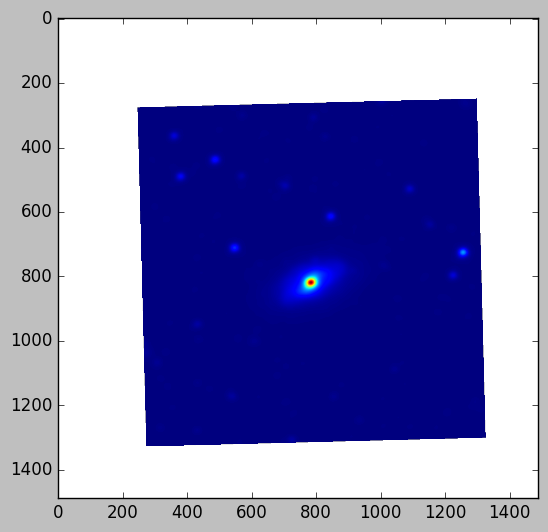

In [181]:
plt.figure(1)
plt.imshow(reproj1)

'''
The for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.
Not sure what sort of range to apply to these for loops
This code is giving an error of array indices being out of range and the for loops may be the result?
'''

In [181]:
###Vickys test starts here

In [117]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

In [118]:
def test_dim(testlist, dim=0):
### tests how many dimensions a list has
### copied from here: http://stackoverflow.com/questions/15985389/python-check-if-list-is-multidimensional-or-one-dimensional
   if isinstance(testlist, list):
      if testlist == []:
          return dim
      dim = dim + 1
      dim = test_dim(testlist[0], dim)
      return dim
   else:
      if dim == 0:
          return -1
      else:
          return dim

In [119]:
test_dim(new_image_array_WISE)

2

In [120]:
new_image_array_WISE = np.array(new_image_array_WISE)
new_image_array_WISE.shape

(1, 1)

In [121]:
new_image_array_SDSS = np.array(new_image_array_SDSS)
new_image_array_COMBINE = np.array(new_image_array_COMBINE)

In [122]:
#print(newtestarrayWISE[0])#[0][0])
#print(newtestarray1[1])
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        a=(2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))
        
        new_image_array_WISE[y-1][x-1] = round(20.50000000000000, 8) - round(a,8) #W1-10a

        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))
        
print(new_image_array_WISE)        
print(a)        #print new_image_array_WISE[0]        
## This still works because the indexing is still the same even though the arrays have been converted. But they'll be easier to work with later on.

[[0]]
1.44586622715


In [123]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]              

In [124]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])

In [125]:
hdulistWISE

In [126]:
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                    1                                                  
NAXIS2  =                    1                                                  
EXTEND  =                    T                                                  

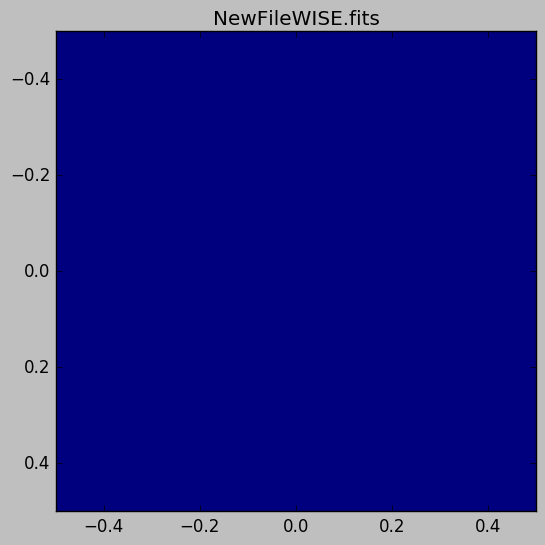

In [127]:
plt.figure(1)
plt.imshow(hdulistWISE[0].data)
plt.title('NewFileWISE.fits')

hdulistWISE[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1489                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T                                                  

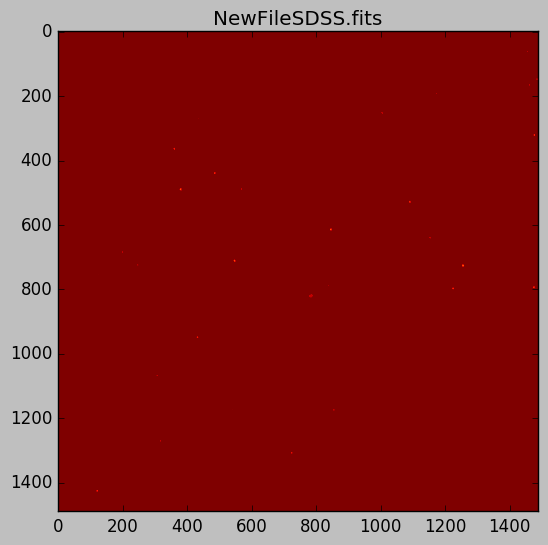

In [128]:


plt.figure(1)
plt.imshow(hdulistSDSS[0].data)
plt.title('NewFileSDSS.fits')

hdulistSDSS[0].header



In [129]:
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)

In [130]:
image_overlap_dataWISE = np.array(image_overlap_dataWISE)
shapeWISE = image_overlap_dataWISE.shape
shapeWISE

(1, 1)

In [131]:
image_overlap_dataSDSS = np.array(image_overlap_dataSDSS)
shapeSDSS = image_overlap_dataSDSS.shape
shapeSDSS

(1489, 1489)

In [132]:
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)

In [133]:
print 'wcsWISE'
print wcsWISE
print '\n'
print 'wcsSDSS'
print wcsSDSS

wcsWISE
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 1 1


wcsSDSS
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 1489 1489


0
17
0


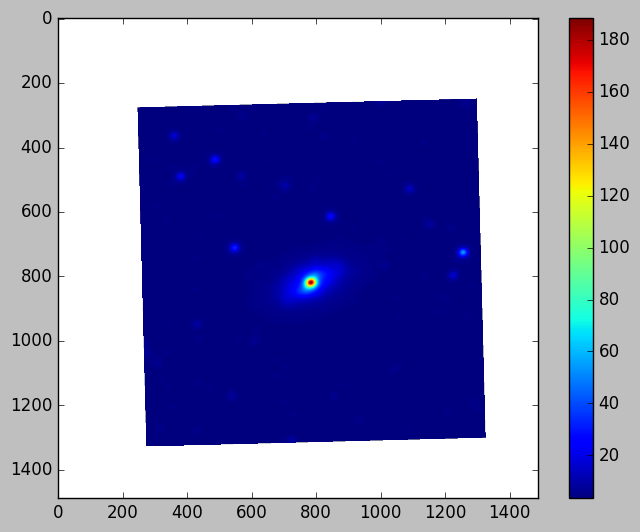

In [143]:
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
for y in range(1, 230):
    for x in range(1, 230):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]

print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0][0])  

plt.figure(1)
plt.imshow(reproj1)
plt.colorbar()

In [ ]:
'''
So now this plot makes a lot more sense! Because both of your new images - 
NewFileWISE.fits and NewFileSDSS.fits - 
are missing all the WCS information from the header, 
the reproj code sets all the parameters to the default values. 
This means it thinks there isn't any reprojecting to do because the images are already in the same system.

Suggestions for next steps

There's a key point early on in your code that results in the images not having WCS information in the header. 
If you solve that issue, your code will work. 
I'm not going to tell you exactly what to do because you can absolutely get it yourself, 
    we just need to simplify the code a little bit (and that's a good thing).

Try to break up your code into steps, like I have here, 
    to find where the problem is and see if you could simplify what's going on at that stage. 
What are you doing to the images there? 
It's easier to get one thing working then to add a step than to try to add all the things at once.

Check what's actually in your variables, arrays, images, headers, etc at each stage too. 
Again, this is easier if you break it up into chunks. It's totally OK to have one line of code in a cell. 
Here's an example of some (what I thought initially would be simple) code that took me a looooong time to debug:
https://github.com/vickyscowcroft/ipython_notebooks/blob/master/simple_rrlyrae_lightcurves.ipynb 
If you look at the first 12 cells, I keep printing the same table and the length of the arrays out. 
That was because I was trying to match some tables using the name of the stars, 
   but the capital letters were messing everything up. 
It took literally days to fix, but the only way I could see what was going on was looking at what 
   was in the tables to see if they were what I thought they should be.

Comment your code! It will be really helpful to you later on if you write now what you think it should do, 
   what it actually does, and why you think it might not be doing what you think. 
Even something you think is super obvious now will not be in a weeks time. LEARN FROM MY MISFORTUNE.
'''